In [ ]:
PART 1. MAKING PREDICTIONS WITH REGRESSION.

In [2]:
#Install needed module
!pip install scipy

#Import needed libraries for:
#data anlysis
import pandas as pd
import numpy as np

#For linear regression
import statsmodels.api as sm
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#import file
reviews = pd.read_csv('turtle_reviews.csv')

#sense check the dataframe
reviews.head
print(reviews.info)
print(reviews.columns)

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

In [11]:
#Find out if there are any missing values in the dataframe
reviews.isnull().any()

gender                    False
age                       False
remuneration (k£)         False
spending_score (1-100)    False
loyalty_points            False
education                 False
language                  False
platform                  False
product                   False
review                    False
summary                   False
dtype: bool

Output shows that there are no missing values in the dataframe's columns.

In [16]:
#Get summary of descriptive statistics of the dataframe.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [ ]:
#We will drop the columns 'laguage' and platform as they are redundant and note needed.
reviews.drop(['language', 'platform'], axis = 1, inplace= True)

In [40]:
#sense-check the dataframe with the columns removed
print(reviews.head())
reviews.columns

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this sp

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

In [131]:
#rename the columns 'remuneration (k£)' and 'spending_score (1-100)' for easier reference
reviews_renamed = reviews.rename(columns = {'remuneration (k£)':'pay', 'spending_score (1-100)':'score'})
reviews_renamed.head()

,gender,age,pay,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [46]:
#save a copy of renamed dataframe to use later. 
reviews_renamed.to_csv('reviews_clean.csv', index = False) #not to save with row numbers(index = False)

In [48]:
#load the saved csv file back to sense check it.
new_reviews = pd.read_csv('reviews_clean.csv')
new_reviews.head()

,gender,age,pay,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [58]:
print(new_reviews.info())
print(new_reviews.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   pay             2000 non-null   float64
 3   score           2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None
(2000, 9)


MULTIPLE REGRESSION.
We will multiple regression to understand how age, renumaration and spending scores affect loyalty points and also find out if we can determine how each of these can be used to predict a customer's loyalty points.

In [71]:
#First we specify the independent varriables and dependednt varriable to help define the predictor and the response.
y = new_reviews['loyalty_points']
X = new_reviews[['age', 'pay', 'score']]
#create model and fit it. This will be used to predict how well one factor predicts the other.
mlrm = linear_model.LinearRegression()
mlrm.fit(X,y)
#predict independent varriables using the x array
mlrm.predict(X)



array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [75]:
#then print the R squared, intercept and coeffient values
print("R Squared:", mlrm.score(X,y)) #print R squared value, which shows the proportion of varriance in y that is explained by X.
print("Intercept:", mlrm.intercept_) #print the intercept which is the value of y when all the values of X are zero.
print("coefficients:") #print the cofficients which is slope that shows the amount of change that is expected in y when X changes.    
list(zip(X, mlrm.coef_)) #map a similar index of multiple containers to be used as a single entity   
      

R Squared: 0.8399114912748796
Intercept: -2203.059751307899
coefficients:


[('age', 11.060658711843349),
 ('pay', 34.00838549260248),
 ('score', 34.183196577633645)]

- The coefficients above predict that loyalty points will increase by 11 points for each additional year in the customers age, by 34 points for each unit of pay and 34 points for each addtional spending score.
- The R squared value shows that the change in loyalty points can be 97% explained by the changes in age, pay and spending score.
- The intercept shows that when age, pay and score values are 0, the loyalty points will be -2203 loyalty points.


In [82]:
#use above model to predict loyalty point values.
new_age = 33
new_pay = 11
new_score = 252
print('Predicted Value: /n', mlrm.predict([[new_age, new_pay, new_score]]))


Predicted Value: /n [7150.19976417]


C:\Users\antho\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Out put shows that if the values of age, pay and score were 33, 11 and 252 respectively, the loyalty points are predicted to be 7150. 
We will change the indepent varriabel values to see the predicted value of loyalty points.

In [85]:
new_age = 56
new_pay = 17.30
new_score = 320
print('Predicted Value: /n', mlrm.predict([[new_age, new_pay, new_score]]))


Predicted Value: /n [9943.30511042]


C:\Users\antho\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Out put shows that if the values of age, pay and score were 56, 17.30 and 320 respectively, the loyalty points are predicted to be 9943. We will change the indepent varriable values to see the predicted value of loyalty points.

In [87]:
#test and train the model to determine how well it will generalize unsee data.
#split the data into 'train' (80%) and 'test' (20%) datasets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.20, random_state = 42)

In [89]:
#training the model using 'statsmodel' OLS library
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() #fit the model with added constant
Y_pred = model.predict(sm.add_constant(X_test)) #set the predicted response vector
print_model=model.summary() #call a summary of the model
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:53:59   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2197.0105     58.134    -37.792      0.0

- Looking at the above table, the coeffeicients for all the three varriables(age, apy and score) are way larger than their standard errors making the 't' values large and p values less than 0.05. This shows that the varriables are statistically significant meaning that there is a high chance that changes in these varriables will result in a change in the dependenta varriable in this case loyalty points.
- The confidence intervals show that our 3 predictor varriables are statsically significant because the ranges are narrow and do not include a zero. We can conclude that any change in the response varriable is not merely by chance but brought about by the independent varriables.
- The big difference between the coeeficients and the standard errors, larger t values as a result and very low p values(less than 0.05) tell us that there is no multicolinerity between the three predictor varriables making them significant.
- R squared of 84% shows the change in the loyalty points can be 84% explained by changes in age, pay and spending scores.


In [101]:
#run regression on the dataset
mlrm = LinearRegression()
mlrm.fit(X_train, y_train) #fit the model
y_pred_mlrm = mlrm.predict(X_test) #call predictions for X in the test set
print("Prediction for test for test set:", format(y_pred_mlrm)) #print the predictions

Prediction for test for test set: [-4.25709053e+02  2.99343559e+03  2.60003812e+03  1.22401268e+03
  1.53391529e+03  1.79212254e+03  4.18943142e+02  1.38614741e+03
  1.36427501e+03  3.26123743e+03  1.28766114e+03  1.65894130e+03
  1.69575771e+03  2.33734079e+03  1.27743942e+03  1.46204653e+03
  1.69474080e+03  8.09214691e+02 -2.63922829e+01 -9.61682267e+02
  1.55468086e+03  5.11057805e+01  1.64730047e+03  1.29858491e+03
  1.41546811e+03  1.42269406e+03  3.87919648e+03  1.61275266e+03
  1.63341589e+03  1.84791589e+03  8.88818487e+01  6.70246855e+02
  1.00427573e+03  1.71837726e+03  1.66852576e+03  1.28842071e+03
  8.91492831e+02  2.09899697e+03  1.36106930e+03  1.07872564e+03
  1.02910663e+03  1.57353521e+03  1.40597357e+03  4.23039314e+03
  4.27476021e+03 -3.51451403e+02  1.71837726e+03  1.53391529e+03
  1.84020998e+03  1.77547954e+03  1.36186127e+03  8.42143578e+02
  8.92577110e+02 -4.98080057e+02  1.95151882e+03  1.49956756e+03
  3.88942654e+02  4.07828006e+03  1.54909408e+03  3.1601

In [103]:
print(mlrm.score(X_test, y_test)*100 )#print the R squred value

82.90723396315803


Above shows the prediction of test datasets and the R squared value of 82% which is high enough to show that the data set is significant.

In [99]:
#find the varriance inflation factor to assess multicolinearity.

In [108]:
x_rev = sm.add_constant(X_train)  # Add constant (intercept) to the model

# Create a dataframe for VIF
vif = pd.DataFrame()

# Calculate VIF for each feature
vif["VIF FACTOR"] = [variance_inflation_factor(x_rev.values, i) for i in range(x_rev.shape[1])]
vif["features"] = x_rev.columns  # Add the feature names

# Print the VIF dataframe, rounded to 2 decimal points
print(vif.round(2))

   VIF FACTOR features
0       20.73    const
1        1.06      age
2        1.00      pay
3        1.06    score


The low vif values of less than 5 in the above output shows there is loe chance of multicolinearity between the three independent varriables therefore we can trust the coefficients as reliable hence the conclusion that the change in loyalty points is not merely by chance but influenced bt changes in age, pay and spending scores.

In [117]:
#test the quality of the training model

"Mean Zquared Error (Final):",metrics.mean_squared_error(y_test,Y_pred) #call the metrcs mean squared error

('Mean Zquared Error (Final):', 277188.7023322059)

In [119]:
"Mean Absolute Error (Final):",metrics.mean_absolute_error(y_test, Y_pred) #call the metrics mean absolute error

('Mean Absolute Error (Final):', 402.23503056376927)

VISUALIZATION.

It is quite diificult to visulaize how all the three independent varriable influnce loyalty points at the same time, so we will visualize how each independent varriable influences the dependent varriable

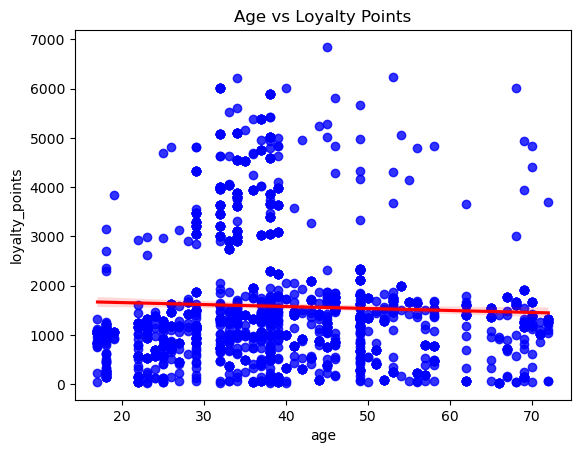

In [121]:
# Plot Age vs Loyalty Points with regression line
sns.regplot(x=X['age'], y=y, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Age vs Loyalty Points')
plt.show()


Interpretation: The plot above has a flat regression line. There no linear relationship between age and loyalty points. The data points are randomly scattered across the plot. The change in number of loyalty points cannot be explained by change in age

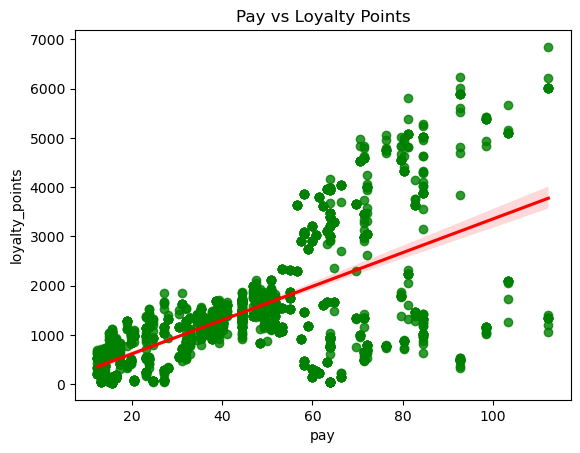

In [123]:
# Plot Pay vs Loyalty Points with regression line
sns.regplot(x=X['pay'], y=y, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Pay vs Loyalty Points')
plt.show()


Interpretation: The spread of data points are spread in such a away that  customers that earn yhe most also have the most loyalty points. There are still some theough who have a low number of loyalty points despite a high pay. There is mosltly a positive linear relationshop. An increase in loyalty points can be explained to be due to an increase in pay.

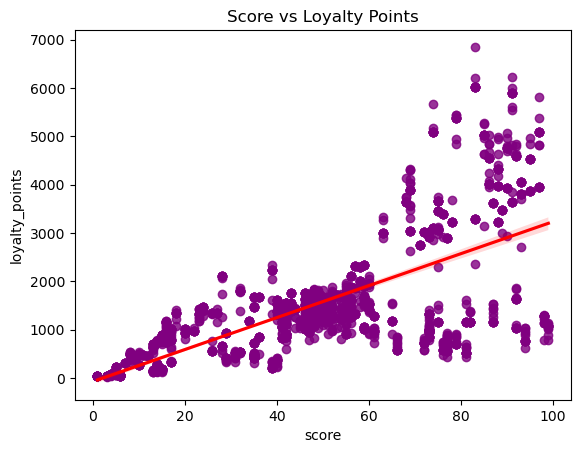

In [125]:
# Plot Score vs Loyalty Points with regression line
sns.regplot(x=X['score'], y=y, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.title('Score vs Loyalty Points')
plt.show()


Same as previous plot, there is a positive linear relationship between loyalty points and the score.. the higher the score, the higher the loyalty points.

CONLUSIONS AND INSIGHTS.
This anlysis has helped us understand and predict how different factors will influnce loyalty points.
It predicted that the spending loyalty points would increase as spending scores increase.
It also predicted that a high pay would lead to customers having more loyalty points because they have more money to spend. This givea an opportunity to the business to target customer and encourage them to buy more for example through barnd deals, propmotional sales and membership prices
Age had no corelation with loyalty ponts so we could not predict if it will influnec loyalty points in future but there could be room for more research here. Products targeted and market to differeng age groups might be helpful in bringing in more customers. 


PART 2: EXPLORING DATA WITH DECISION TREES

In this section, we will explore leverage Decision Trees to see whether they can help us understand how the different features (variables) contribute to the accumulation of loyalty points.

In [54]:
#First we import the necessary libraries
import math
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [7]:
#load the needed file
decisions = pd.read_csv('reviews_clean.csv')
decisions.head()

,gender,age,pay,score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [19]:
#convert categorical varriables in the datase into numerical format. This helps with classifying the data when using decision trees.
decisions_num = pd.get_dummies(decisions, columns=['gender', 'education'], drop_first=False)
# Convert True/False to 1/0 if needed. this is because converting categorical columns to numbers might output as True/ False
# Exclude non-numeric columns like 'review' and 'summary'
binary_columns = decisions_num.columns.difference(['review', 'summary'])
# Apply astype(int) only on binary columns
decisions_num[binary_columns] = decisions_num[binary_columns].astype(int)
decisions_num.head()


,age,pay,score,loyalty_points,product,review,summary,gender_Female,gender_Male,education_Basic,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12,39,210,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,0,1,0,0,0,1,0
1,23,12,81,524,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,0,1,0,0,0,1,0
2,22,13,6,40,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1,0,0,0,0,1,0
3,25,13,77,562,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,1,0,0,0,0,1,0
4,33,13,40,366,291,As my review of GF9's previous screens these w...,Money trap,1,0,0,0,0,1,0


The new dataframe has now converted the categorical column i.e 'gender' and 'education' to numbers, 0 for False and 1 for True for easy analysis

In [74]:
#Specify that loyalty points is the target variable (Y) and should be excluded from the input data 
##and that X for the independent variables and y as the dependent variable.
###the 'review' and 'summary' columns will also be exculuded as they are not categorical and cannot be converted into numerical values.
X = decisions_num.drop(columns=['loyalty_points', 'review', 'summary'])  # Independent variables
y = decisions_num['loyalty_points']  # Dependent variable

In [76]:
#Split the data set into a train and test sets for both X and y at a 30:70 ratio with random_state=42. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#create varriable to store the DecisionTreeRegressor class and fit the regressor object to the dataset.
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [80]:
#TEST ACCURACY OF THE MODEL
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict))) 

Mean Absolute Error:  36.49666666666667
Mean Squared Error:  9267.106666666667
Root Mean Squared Error:  96.26581255392107


Looking the values above, the difference between Root Mean Squared Error and Mean absolute error is big (57.776). The Root mean Squared Error is about 3 times larger indicating the presensce of outliers in the dataset.

In [83]:
#prune the tree to reduce instances of overfitting.
# Unprunned tree is as below
y_pred_unpruned_t = regressor.predict(X_test)

# Apply pruning by limiting the tree depth
prunedT_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
prunedT_regressor.fit(X_train, y_train)
y_pred_pruned_t = prunedT_regressor.predict(X_test)


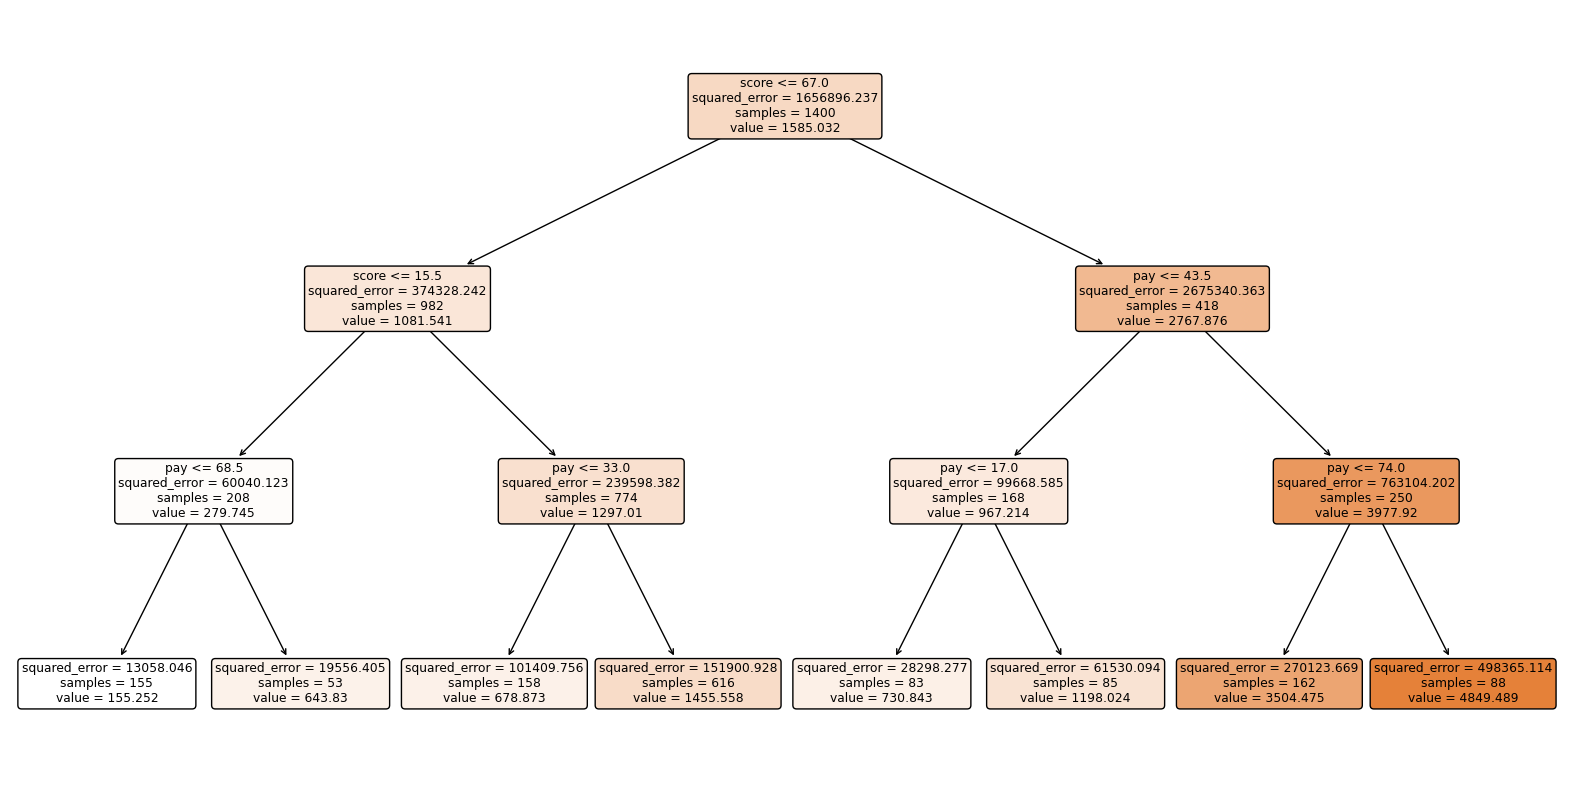

In [85]:
#We then plot the decision tree.
plt.figure(figsize=(20,10))
tree.plot_tree(prunedT_regressor, feature_names=X.columns, filled=True, rounded=True)
# Save the the decison tree as PNG
plt.savefig("decision_tree_visualization.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


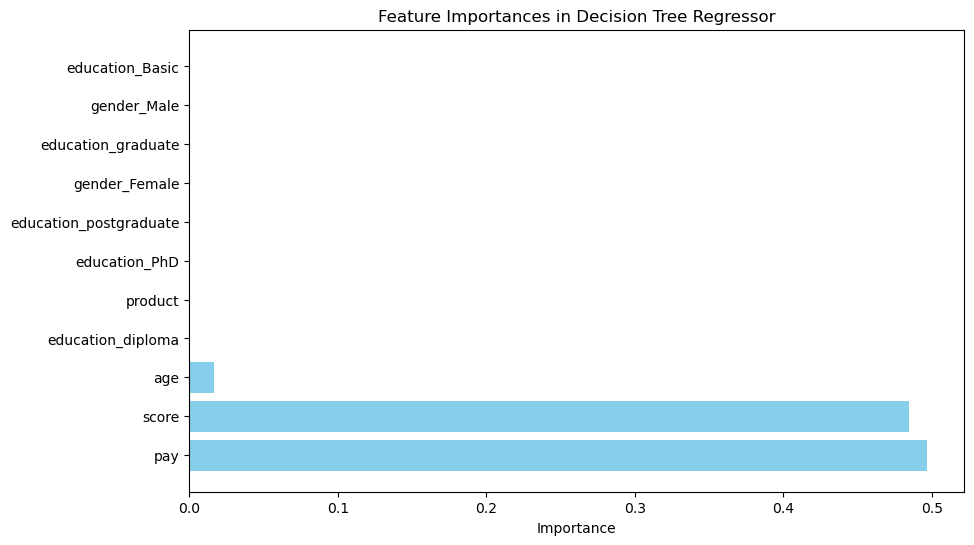

In [87]:
#find out which features are important in the decision tree.
# Get feature importances
importances = regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_dec = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_dec = feature_importance_dec.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dec['Feature'], feature_importance_dec['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree Regressor')
plt.show()


The bar graph above shows that pay and score have the highest corelation to the increase in loyalty followed by age and the rest like gender, product and education status have littlle to no corelation.

CONLUSIONS AND INSIGHTS.
This analysis has helped us understand how different factor influence the customers' loyalty points.
It has found that pay and spending scores had the highest corelation to loyalty points. 
High earning customers had high loyalty points and customers with high spending scores also had high number of loyalty points.
This such as age, education level and gender had little to no influnce.
Stakeholder can look into rewarding customer that spend alot by offering money off next time they come in, more reward schemes like doubling or trippling the loyalty points, member prices on specific items. Thsi will retain help retain the currennt customer and even encourage new ones to sign up for the membership program.

PART 3. USING K-MEANS CLUSTERING TO IDENTIFY POTENNTIAL TARGET GROUPS IN THE DATA.

 We will use K-Means clustering to know if and how remuneration and spending scores can be used to better understand and describe customer behaviour by identifying groups within the customer base that can be used to target specific market segments. 

In [92]:
#import necessary libaries.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [98]:
#load needed file
cluster_fl = pd.read_csv('reviews_clean.csv')
cluster_fl1 = cluster_fl[['pay', 'score']] #create a new dataframe with only neded columns, in this case we will only use the 'pay' and 'score' columns.
cluster_fl1.head() #sense-check the new dataframe.


,pay,score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [100]:
cluster_fl1.info #explore dataframe

<bound method DataFrame.info of         pay  score
0     12.30     39
1     12.30     81
2     13.12      6
3     13.12     77
4     13.94     40
...     ...    ...
1995  84.46     69
1996  92.66      8
1997  92.66     91
1998  98.40     16
1999  92.66      8

[2000 rows x 2 columns]>

C:\Users\antho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\antho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


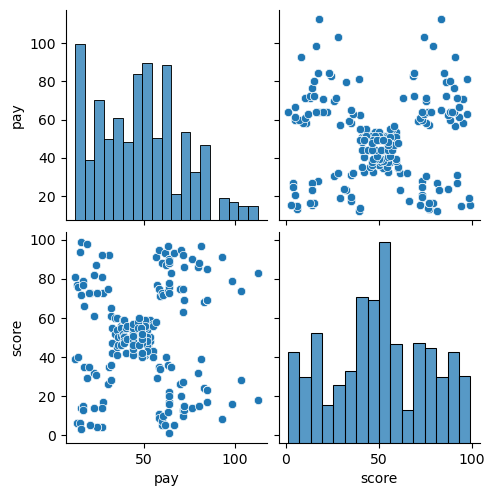

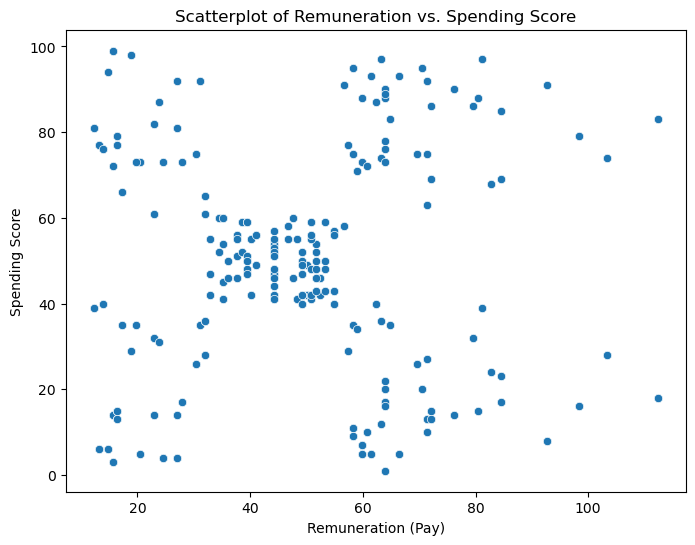

In [107]:
#visualize the data using a scatter plot
# Plotting the pairplot
sns.pairplot(cluster_fl1)
plt.show()
# Plot scatterplot of remuneration vs. spending score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pay', y='score', data=cluster_fl1)
plt.title('Scatterplot of Remuneration vs. Spending Score')
plt.xlabel('Remuneration (Pay)')
plt.ylabel('Spending Score')
plt.show()


The scatter plot shows that people with pay of around 10 to 25 have varried amounts of spending scores ranginging from almost zero to almost 100. People with pay of around 40 seem to have between 40 to 60 spending scores, while people with pay of about 60 to 100 seem to be clustered around scores of zero to 40 and 60 to 100. There are no disnticnt clusters demonstrated on this scatterplot with implies that there is no clear corelation between pay and scores. There could be other factors influencing the spending scores other than pay.
The pairplot refletcts the same. There are several peaks with somewhat a curve towards the end hence an unclear corelation between pay and score.

In [114]:
#standardize the data
scaler = StandardScaler()
clusterfl1_scaled = scaler.fit_transform(cluster_fl1)


C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\clust

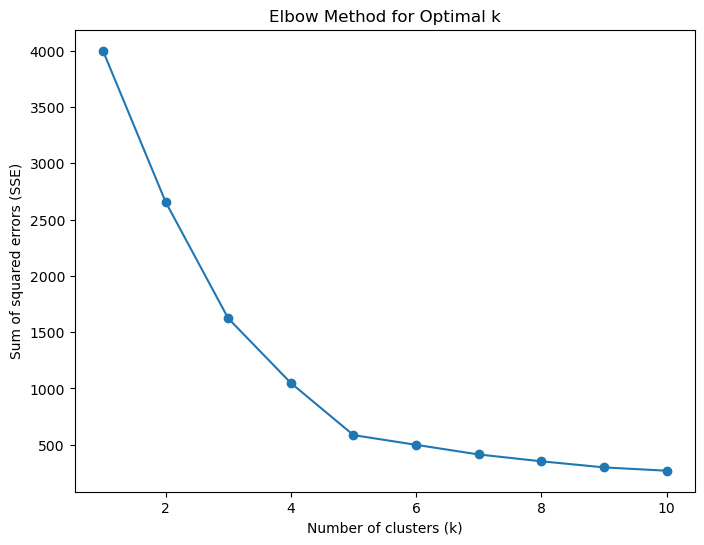

In [116]:
#plot elboe graph
# Apply K-means for different cluster values
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clusterfl1_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.show()


The optimal number of clusters in the above elbow gragh is 5. This means there are 5 well defined clusters in the dataset.

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\antho\anaconda3\Lib\site-packages\sklearn\clust

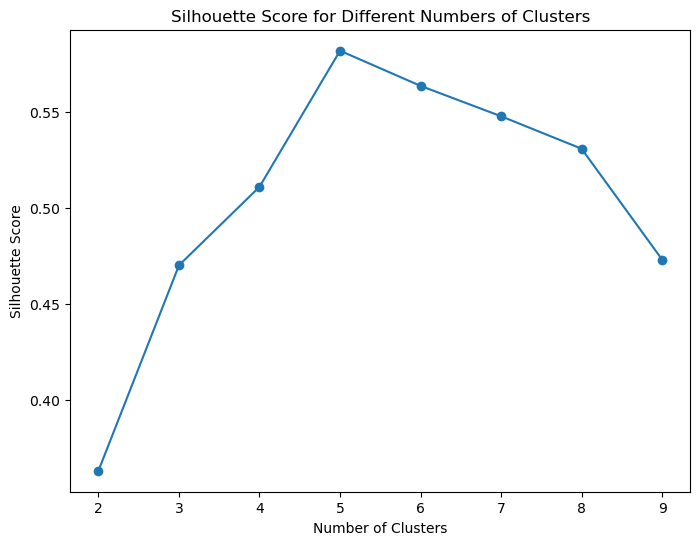

In [120]:
#silhoutte methode to get the number of clusters
# Initialize variables
sil_scores = []
cluster_range = range(2, 10)  # Adjust range to explore more clusters

# Loop over the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clusterfl1_scaled)
    labels = kmeans.labels_

    # Check if the number of unique labels is greater than 1
    if len(np.unique(labels)) > 1:
        sil_scores.append(silhouette_score(clusterfl1_scaled, labels))
    else:
        print(f"Only 1 cluster found for n_clusters = {n_clusters}, skipping silhouette score.")

# Plot the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range[:len(sil_scores)], sil_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The number o clusters with the highest silhouette score is five. This means that there are 5 well defined clusters in the dataset

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


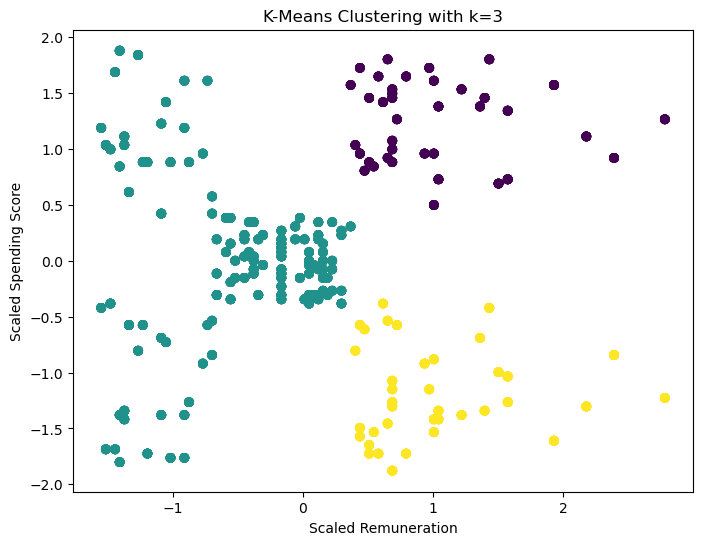

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


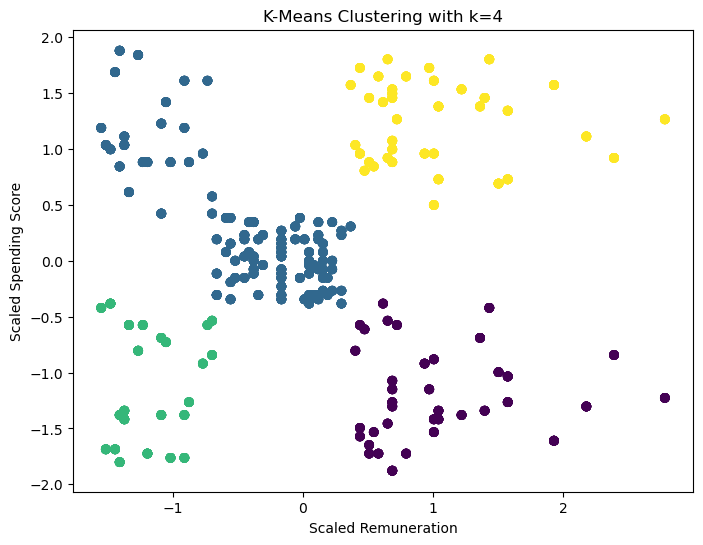

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


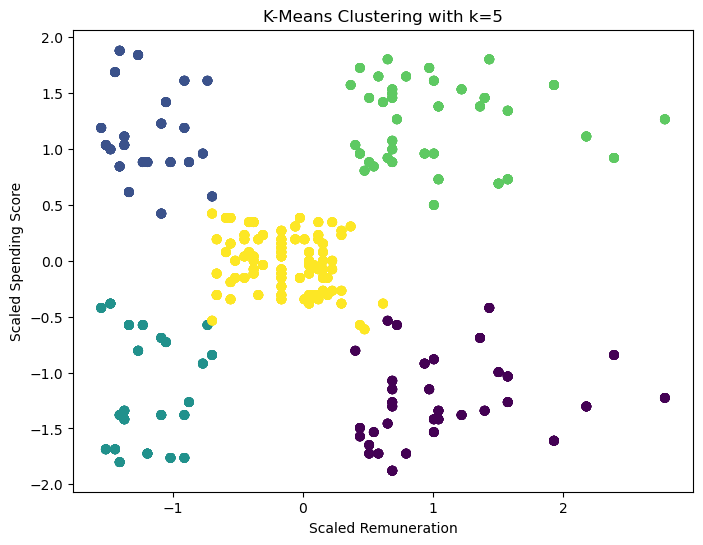

In [125]:
#Evaluate usefulness of three k-values
# pick different k-values.
k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clusterfl1_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(clusterfl1_scaled[:, 0], clusterfl1_scaled[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Scaled Remuneration')
    plt.ylabel('Scaled Spending Score')
    plt.show()


k-value 5 will give the best clusters as the seem separated and coherent.

In [132]:
#fit a final model using k-value of 5.
final_k = 5
kmeans = KMeans(n_clusters=final_k, random_state=42)
cluster_fl1['Cluster'] = kmeans.fit_predict(clusterfl1_scaled)

# Check the number of observations in each cluster
print(cluster_fl1['Cluster'].value_counts())

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
4    774
3    356
0    330
2    271
1    269
Name: count, dtype: int64


C:\Users\antho\AppData\Local\Temp\ipykernel_15908\1323416296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_fl1['Cluster'] = kmeans.fit_predict(clusterfl1_scaled)


The fitted model gives details of clusters and how many there are in each cluster. There four clusters with 774 observations and one cluster of observation of 269.

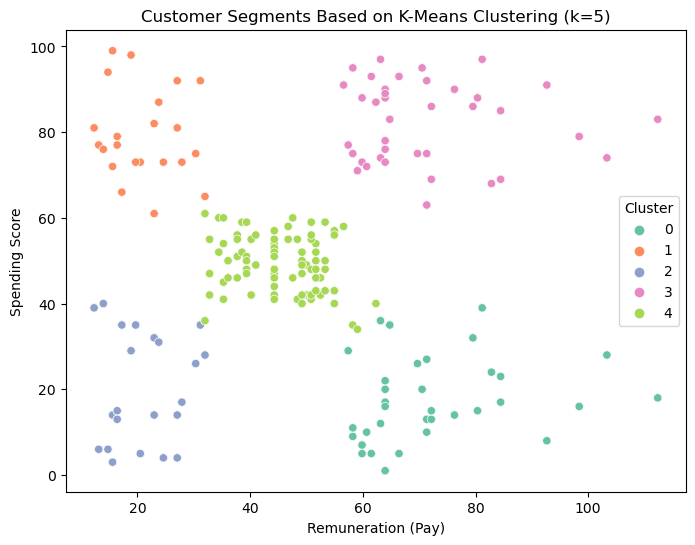

In [141]:
#pot the final clusters got from the model
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pay', y='score', hue='Cluster', data=cluster_fl1, palette='Set2')
plt.title(f'Customer Segments Based on K-Means Clustering (k={final_k})')
plt.xlabel('Remuneration (Pay)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


There are 5 groups identified with different earning and spending capabilities. Group 0 is high earning but low spending, group 1 is low earning and high spending, group 2 low earning and low spending, group 3 is moderately high earning and moderately high spending too and group 4 moderately low earning and moderately low spending as well.
The biggest groups are group 3 then group 4 and 0. The smallest groups are 1 and 2.
Groups 1 and 3 who are the highest spenders could be appreciated by being given coupons, more loyalty points and discounts to make them feel appreaciated and encourage more spending which in turn will raise profit margins.
Groups 2 and 0 are the lowest spenders. These groups be given deals, offers, discounts and opportunity to earn more loaylty points to encourage them to spend. Marketing adverts should also be targeted to this group to help bring more of them to the business.

SUMMARY AND INSIGHTS.
This K-means clustering analysis sought to find out if there is any relationship between the pay of customers and how they spend. It found that generally, spending habits were not directly related to how much one earns but the customers habits were spread across the inncome bracket. There were custtomer that were high earning yet low spenders, and there were those that were low earning but were high spenders.
It is suggested that different approaches be used on different groups of customers. 
- There should be marketing adverts enticing offers and discounts targeted at the low spending customers to encourage them to spend more.
- There should also be reward systems like money off next purchases, double or tripple loyalty points to the high spending customers to appreciate them and retain them.
- Discounts, offers and marketing adverts should also be directed to all customers, present and potential to increase reach and therefore sales.

PART 4. SENTIMENT ANALYSIS OF CUSTOMER REVIEWS

In [209]:
#import necessary libraries.
!pip install google_api_python_client
import googleapiclient.discovery
from googleapiclient.discovery import build
import os
import json
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
!pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
!pip install nltk textblob
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
import re
from nltk.probability import FreqDist


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [149]:
#load the file
reviews_senti = pd.read_csv('reviews_clean.csv')
reviews_senti1 = reviews_senti[['review', 'summary']] #only load the required columns
reviews_senti1.head() #sense check the dataset

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [153]:
#find if there are any missing values.
reviews_senti1.isnull().sum()

review     0
summary    0
dtype: int64

There are no missing values in this dataset.

In [162]:
#change data to lowercse for easy analysis
reviews_senti1.loc[:,'review'] = reviews_senti1['review'].str.lower()
reviews_senti1.loc[:,'summary'] = reviews_senti1['summary'].str.lower()
#join elements in each column
reviews_senti1.loc[:,'review'] = reviews_senti1['review'].apply(lambda x: ' '.join(x.split()))
reviews_senti1.loc[:,'summary'] = reviews_senti1['summary'].apply(lambda x: ' '.join(x.split()))


In [168]:
#replace punctuation marks in both columns-
reviews_senti1.loc[:,'review'] = reviews_senti1['review'].str.replace(r'[^\w\s]', '', regex=True)
reviews_senti1.loc[:,'summary'] =reviews_senti1['summary'].str.replace(r'[^\w\s]', '', regex=True)
#drop any duplicates in both columns
reviews_senti1_clean =reviews_senti1.drop_duplicates(subset=['review', 'summary'])
reviews_senti1_clean.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


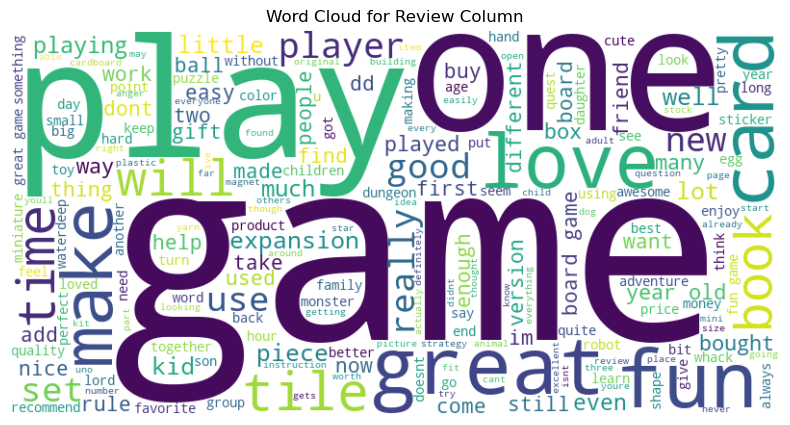

In [184]:
#Tokenize both columns separately to split text into individual words
#1. Create a copy of original dataframe
senti_copy = reviews_senti1_clean.copy()
#2.Apply tokenization on both columns
senti_copy['review_tokens'] = reviews_senti1_clean['review'].apply(word_tokenize)
senti_copy['summary_tokens'] = reviews_senti1_clean['summary'].apply(word_tokenize)
#3.create word clouds and for the 'review' column to view most frequently occuring words.
rev_text = ' '.join(senti_copy['review'])
rev_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(rev_text)
##plot word cloud for 'review' column
plt.figure(figsize=(10, 5))
plt.imshow(rev_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Column')
plt.show()

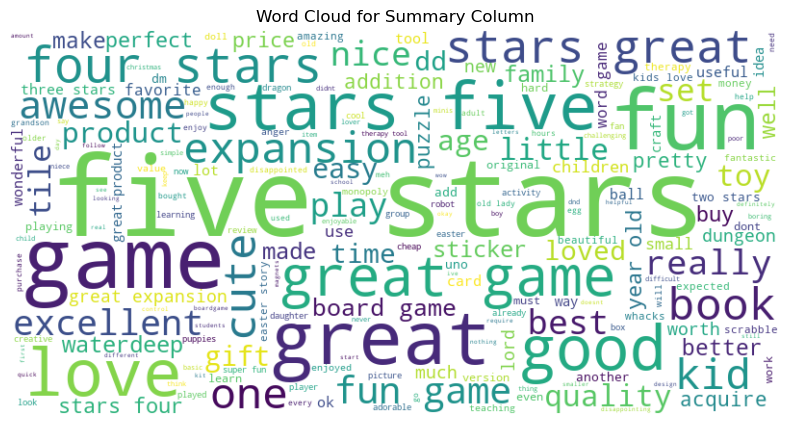

In [186]:
#4.create word clouds and for the 'summary' column to view most frequently occuring words.
sum_text = ' '.join(senti_copy['summary'])
sum_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sum_text)
##plot word cloud for 'summary' column
plt.figure(figsize=(10, 5))
plt.imshow(sum_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

Both wordcloud visualisatios above show the frequently appearing words in both the 'review' and 'summary'. We can see the words 'game, play, one, great' among others as commonly appearing in the 'review' column and the words 'five, stars, game, great' among others as commonly appearing. 
Word clouds can be used to identify coomon themes and commonly used words in conversations, interviews, texts, tweets etc.
They can also help us identify emotionally charged words either positive or negative for example from reviews left onine
They also help us understand sentiment in text over time be it positive or negative sentiments.


In [238]:
# Define stop words
stop_words = set(stopwords.words('english'))

#1: Combine 'review' and 'summary' columns for analysis
reviews_senti1_clean['combined'] = reviews_senti1_clean['review'] + ' ' + reviews_senti1_clean['summary']
reviews_senti1_clean2 = reviews_senti1_clean['combined']

#2: Clean and tokenize the text
def clean_and_tokenize(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize into words (not letters)
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens_no_stopwords = [word for word in tokens if word not in stop_words]
    return tokens_no_stopwords

# Apply the cleaning and tokenization function
reviews_senti1_clean['tokens_no_stopwords'] = reviews_senti1_clean2.apply(clean_and_tokenize)

# 3: Create frequency distribution of words
all_words = [word for tokens in reviews_senti1_clean['tokens_no_stopwords'] for word in tokens]
fdist = FreqDist(all_words)

#4: Print the 15 most common words
most_common_words = fdist.most_common(15)
print("15 Most Common Words:", most_common_words)

#5: Calculate sentiment polarity for the most common words using TextBlob
word_polarity = [(word, freq, TextBlob(word).sentiment.polarity) for word, freq in most_common_words]
print("\nWord | Frequency | Sentiment Polarity")
for word, freq, polarity in word_polarity:
    print(f"{word} | {freq} | {polarity}")

C:\Users\antho\AppData\Local\Temp\ipykernel_15908\1550887814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_senti1_clean['combined'] = reviews_senti1_clean['review'] + ' ' + reviews_senti1_clean['summary']


15 Most Common Words: [('game', 1990), ('great', 875), ('fun', 770), ('one', 568), ('play', 528), ('like', 468), ('stars', 464), ('love', 416), ('good', 381), ('five', 362), ('really', 349), ('get', 333), ('tiles', 317), ('book', 316), ('time', 309)]

Word | Frequency | Sentiment Polarity
game | 1990 | -0.4
great | 875 | 0.8
fun | 770 | 0.3
one | 568 | 0.0
play | 528 | 0.0
like | 468 | 0.0
stars | 464 | 0.0
love | 416 | 0.5
good | 381 | 0.7
five | 362 | 0.0
really | 349 | 0.2
get | 333 | 0.0
tiles | 317 | 0.0
book | 316 | 0.0
time | 309 | 0.0


C:\Users\antho\AppData\Local\Temp\ipykernel_15908\1550887814.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_senti1_clean['tokens_no_stopwords'] = reviews_senti1_clean2.apply(clean_and_tokenize)


The ouput shows 15 most frequent words with associated sentiment. The sentiment is mostly neautral with a few words being positive and one word's sentiment is negative.

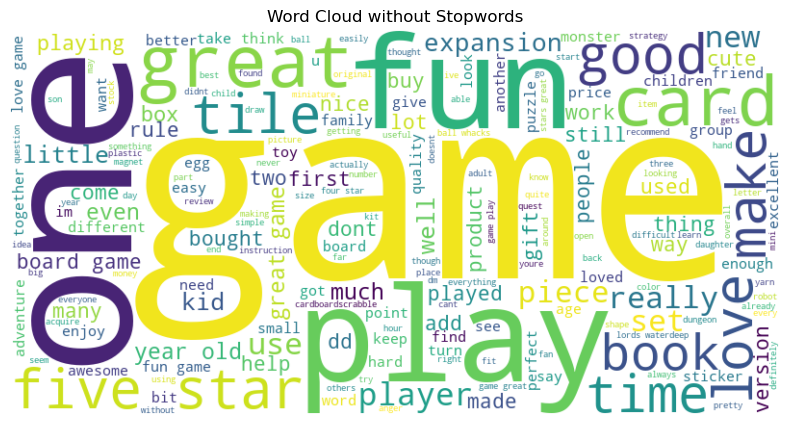

In [240]:
# 3. Create a word cloud without stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud without Stopwords')
plt.show()

ValueError: The 'color' keyword argument must have one color per dataset, but 15 datasets and 1 colors were provided

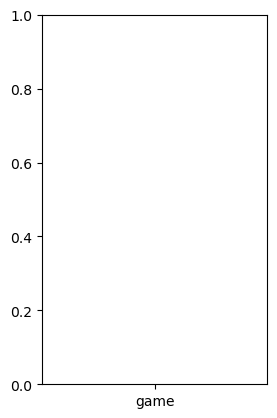

In [262]:
# Histogram for 'summary' polarity
plt.subplot(1, 2, 2)
plt.hist(word_polarity, bins=15, color='green', alpha=0.7)
plt.title('Histogram of Summary Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [270]:
# Step 3: Identify and print the top 20 positive and negative reviews and summaries
# Sort by polarity
top_20_positive_reviews = reviews_senti1_clean.sort_values(by='review', ascending=False).head(20)
top_20_negative_reviews = reviews_senti1_clean.sort_values(by='review').head(20)

top_20_positive_summaries = reviews_senti1_clean.sort_values(by='summary', ascending=False).head(20)
top_20_negative_summaries = reviews_senti1_clean.sort_values(by='summary').head(20)

# Print top 20 positive reviews and summaries
print("Top 20 Positive Reviews:")
print(top_20_positive_reviews['review'])

print("\nTop 20 Positive Summaries:")
print(top_20_positive_summaries['summary'])

# Print top 20 negative reviews and summaries
print("\nTop 20 Negative Reviews:")
print(top_20_negative_reviews['review'])

print("\nTop 20 Negative Summaries:")
print(top_20_negative_summaries['summary'])

Top 20 Positive Reviews:
1958                             you need some wild cards
1446    you can play the expansions one at a time or a...
1984    yes you can find obscure short words to use in...
224     yes these are ridiculously cute yes they are f...
1417                     yes quick wonderful and accurate
1152                 yes product was exactlya s described
925     wrath of ashardalon is a fun game if you like ...
928     wrath of ashardalon gets everything right for ...
599     wow this product is incredible i was hesitant ...
41      wow great images on vellum got this for my hus...
1139    would definitely recommend for any dd or pathf...
978     worth the price for the wealth of plastic mini...
10                                        works very well
1178                             works great for my games
1830                wore out the first set of these cards
382     wonderful tool for use when working with child...
254     wonderful product keeps my kids busy my

Output shows the top 20 positive and negative reviews. The positive sentiments vary from from phrases like 'wonderful', 'great product', 'exactly as described' etc.
Negative reviews are like 'dissappointing game' but most of the reviews in classified as negative have positive sentiments so perhaps deeper analysis of each individual review is needed.

CONCLUSIONS AND INSIGHTS
The general sentiment of the reviews is varies from mostly neautral to to moderately positive. There are avfew negative reviews.
A closer look at the reviews show that reviews labeled as having negative sentiment are actually not negative. 
This give a false summary of the reviews.
It would be helpful to look carefully at each and every review if poassible so classify it,
There is a lot of room for improvement as most reviews have been calssified as neautral hence the team responsible can find way to improve the neutarl experience to positive experience,
The team can also engage customers who left negative reviews and ways to resolve their dissatisfaction. This will in turn improve customer retention.
the team can also respond to the customers that left good reviews and thank them for their custom.
